In [1]:
import pandas as pd 
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
df = pd.read_csv('C:/Users/bodie/Documents/resturant_reviews.csv',encoding='ISO-8859-1')

In [3]:
df['DATE']= pd.to_datetime(df['Date'])
df['Length_of_Review'] = df['Review'].str.len()
df['YEAR'] = pd.DatetimeIndex(df['DATE']).year

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Review            1210 non-null   object        
 1   Date              1210 non-null   object        
 2   Overall           860 non-null    float64       
 3   Food              860 non-null    float64       
 4   Service           860 non-null    float64       
 5   Ambience          860 non-null    float64       
 6   Rating            1210 non-null   int64         
 7   Source            1210 non-null   object        
 8   DATE              1210 non-null   datetime64[ns]
 9   Length_of_Review  1210 non-null   int64         
 10  YEAR              1210 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 104.1+ KB


In [4]:
df.head()

,Review,Date,Overall,Food,Service,Ambience,Rating,Source,DATE,Length_of_Review,YEAR
0,blackbear's website promised brunch Saturday's...,9/18/2022,NaN,NaN,NaN,NaN,1,Yelp,2022-09-18,872,2022
1,I stopped by blackbear for a quick lunch whil...,9/18/2022,NaN,NaN,NaN,NaN,5,Yelp,2022-09-18,560,2022
2,Very disappointed. The hostess with the red br...,9/11/2022,NaN,NaN,NaN,NaN,1,Yelp,2022-09-11,345,2022
3,This place was highly recommended to me by a c...,9/8/2022,NaN,NaN,NaN,NaN,5,Yelp,2022-09-08,537,2022
4,My son and I came here for brunch. The hostess...,9/4/2022,NaN,NaN,NaN,NaN,4,Yelp,2022-09-04,257,2022


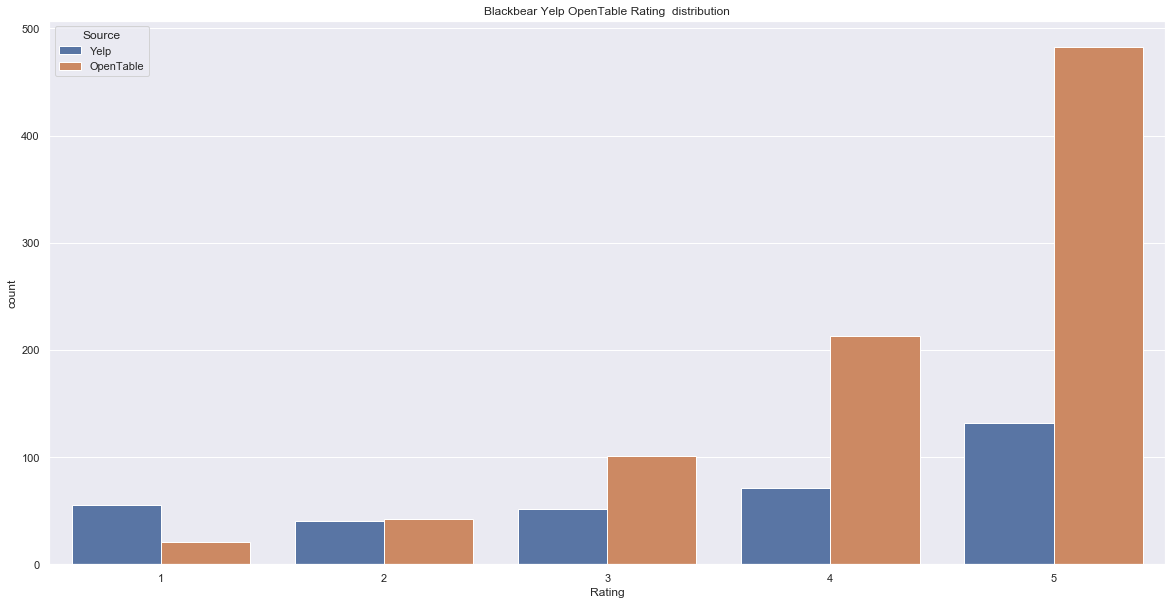

----------------------------------
Source
OpenTable    4.273256
Yelp         3.528571
Name: Rating, dtype: float64
----------------------------------
Source
OpenTable    860
Yelp         350
Name: Rating, dtype: int64


In [5]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(data=df,x='Rating',hue='Source').set(title='Blackbear Yelp OpenTable Rating  distribution')
plt.show()
print("----------------------------------")
print(df.groupby(['Source'])['Rating'].mean())
print("----------------------------------")
print(df.groupby(['Source'])['Rating'].count())

The histgram above raises may questions

•Why does Opentable have more reviews and higher averages?

•The reviews from the two data sources almost look like the reviews are from two different resturants

•What makes a 5 Star experience from customers perserpective

•what makes a 1 star experience

•Do customers from both data sources share same views of what makes an experience?

•OpenTable average is nearly 1 star higher than Yelp. .74


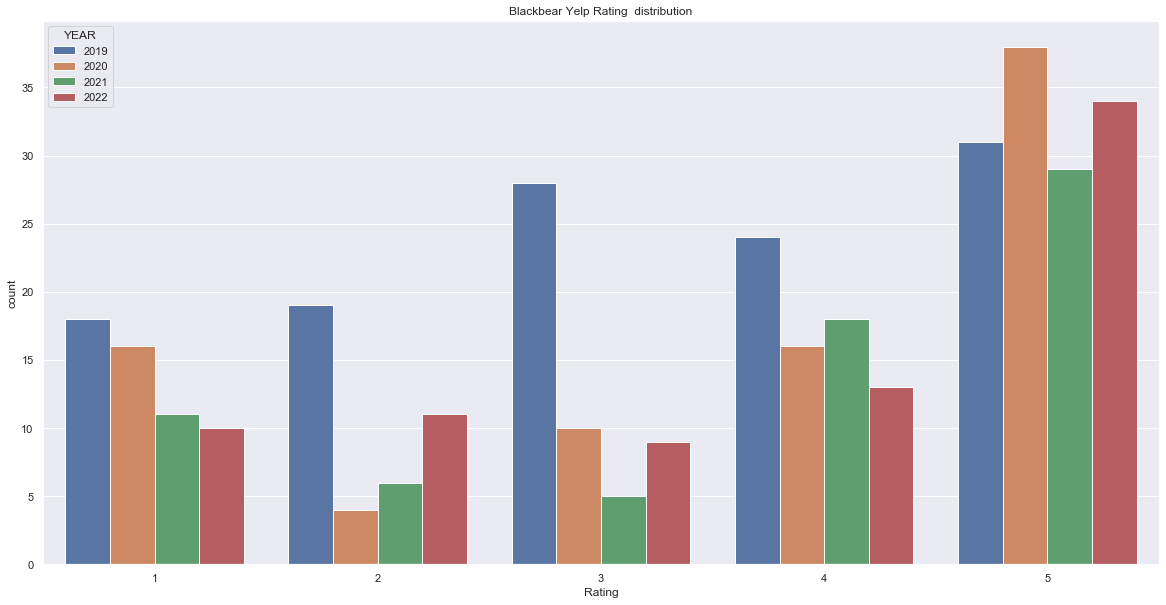

In [8]:
yelp_df = df[df['Source']=='Yelp']
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(data=yelp_df,x='Rating',hue="YEAR").set(title='Blackbear Yelp Rating  distribution')
plt.show()

1 Yelp Star Reviews are trending down. 2 Yelp star reviews started trending down , but have trended up in 2022.  3 & 4 Yelp Star Reviews are trending down, while we see 5 Star  Yelp reviews trending upward. 

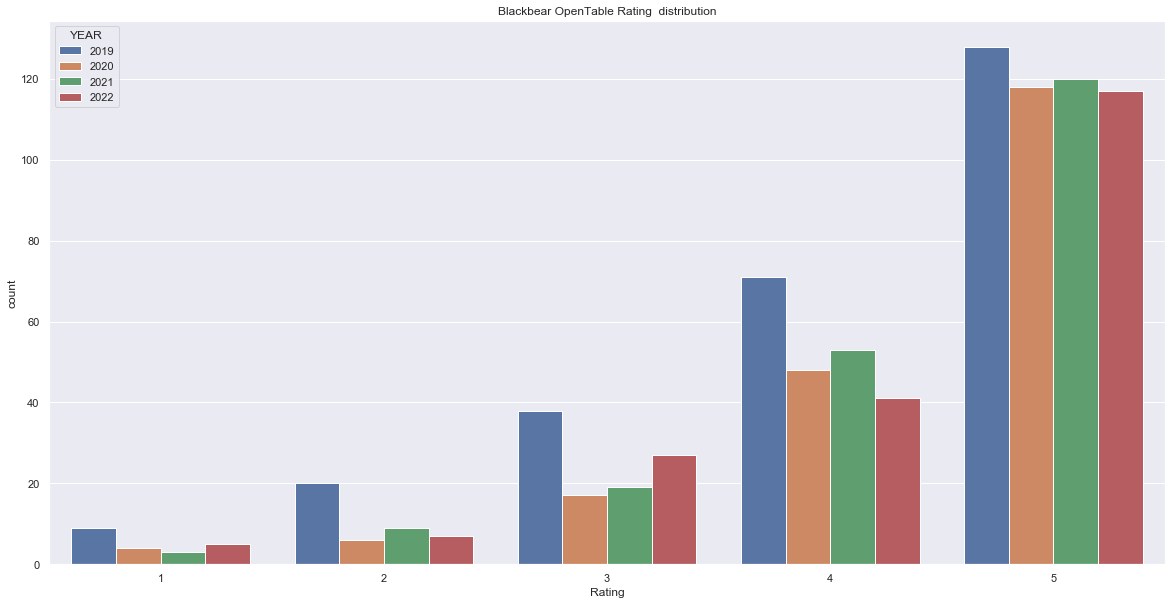

In [9]:
OpenTable_df = df[df['Source']=='OpenTable']

sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(data=OpenTable_df,x='Rating',hue="YEAR").set(title='Blackbear OpenTable Rating  distribution')
plt.show()

3 Star OpenTable reviews are trending upward. It looks like 2022 is on target to pass or meet 2019 3 Star rating count. While 4 Stars are lower than 2021.  5 Star Opentable Reviews are on target to meet 2019 5 star counts.

### Length Of Reviews By Data Source

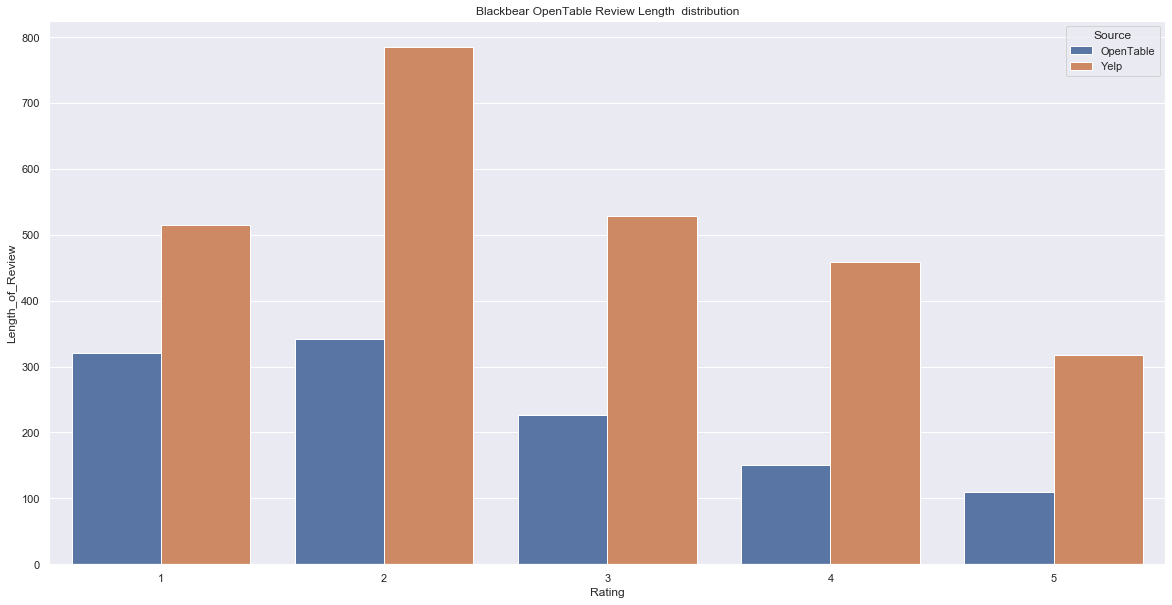

In [10]:
review_length = df.groupby(['Source','Rating'])['Length_of_Review'].median().reset_index()
review_length
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data=review_length,x='Rating',y='Length_of_Review',hue="Source").set(title='Blackbear OpenTable Review Length  distribution')
plt.show()

This makes sense, it seems that users with a negative experience have more feedback to provide, as measured by the length of their review. While positive expereinces generally have fewer things to give.  We see that tread in both Review sources.

[Text(0.5, 1.0, '2022 Blackbear Yelp Rating  distribution')]

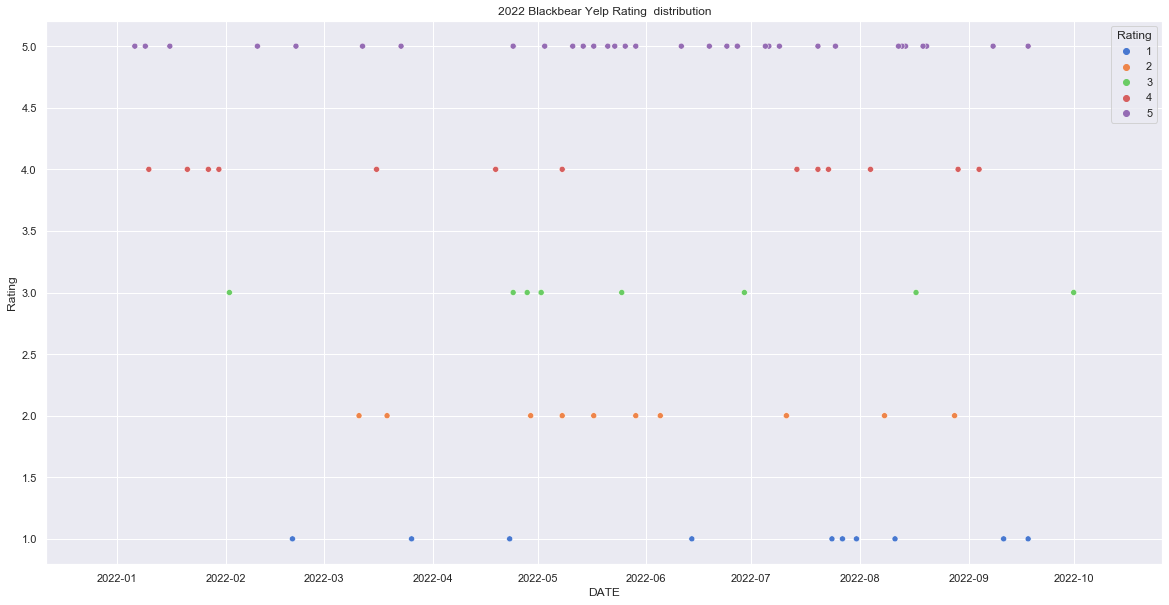

In [11]:
DF_22 = df[df['DATE']>= '2022-01-01']

Yelp_DF_22 = DF_22[DF_22['Source']=='Yelp']

sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(data=Yelp_DF_22, x="DATE", y="Rating",hue="Rating",palette="muted").set(title='2022 Blackbear Yelp Rating  distribution')

[Text(0.5, 1.0, '2022 OpenTable  Rating  distribution')]

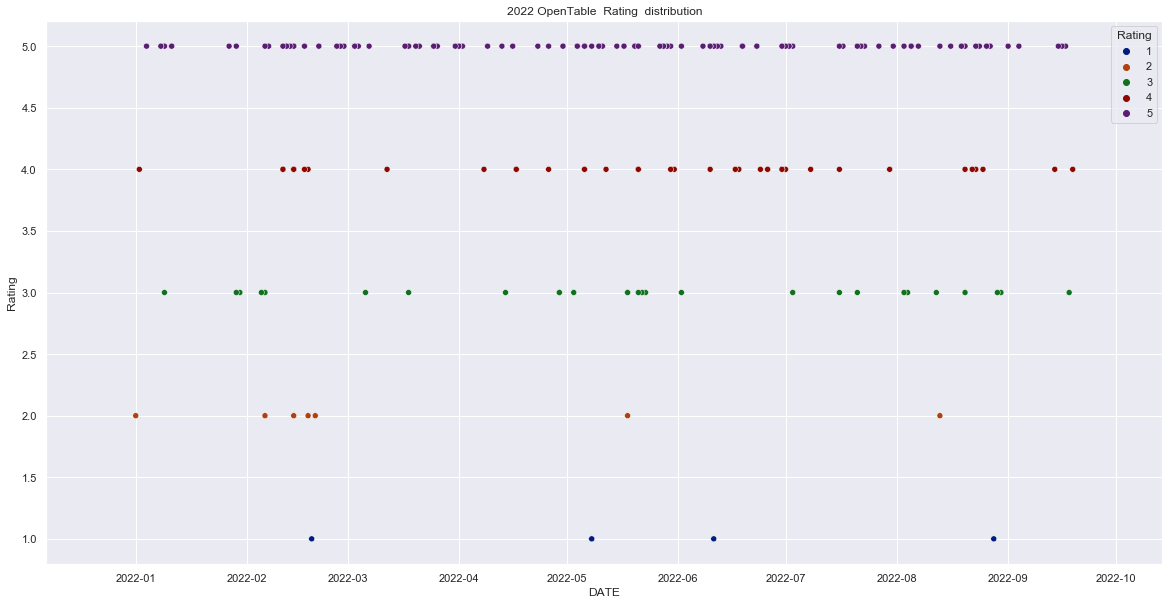

In [12]:
OpenTable_DF_22 = DF_22[DF_22['Source']=='OpenTable']

sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(data=OpenTable_DF_22, x="DATE", y="Rating",hue="Rating",palette="dark").set(title='2022 OpenTable  Rating  distribution')

## Analzying Review Sentiment

In [13]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
stop_words = set(stopwords.words('english'))
vectorizer = CountVectorizer(stop_words=stop_words)

In [15]:
three_and_less = df[df['Rating'] <= 3]
three_and_less = three_and_less[three_and_less['YEAR']==2022]
len(three_and_less)

69

In [16]:
vectorizer.fit(three_and_less['Review'])

CountVectorizer(stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...})

In [17]:
vocab =  vectorizer.vocabulary_

##  Isolating specific Keywords 

In [18]:
df_2022 =  df[df['YEAR'] == 2022]
df_2022 = df_2022['Review'].to_list()
df_2022 = [x.lower() for x in df_2022]
define_words = 'dry'


dry_list = []
for txt in df_2022:
    
   
    dry_sentences = re.findall(r"([^.]*?%s.*?\.)(?!\d)" % define_words,txt)
    if len(dry_sentences) >= 1:
        dry_list.append(dry_sentences)
    else:
        pass
print("Here is what Customers are saying about dry food at Blackbear")
print("----------------")
dry_list

Here is what Customers are saying about dry food at Blackbear
----------------


[[' i got the wedge salad with chicken and that chicken was so dry!!! my coworker said her burger was sweet? super weird.'],
 [' bland, dry & way overpriced.'],
 [' \xa0the tri tip could have used a bit more seasoning and it came out lukewarm and was on the dryer side.'],
 [' i just wished there was more of a spread/aioli because it was a bit dry.'],
 ['the bbq chicken flatbread appetizer was not a good start as the chicken and bread were too dry.'],
 [' the crab was bland and dry, definitely did not taste fresh like all other times.']]

In [19]:
define_words = 'quality'


quality_list = []
for txt in df_2022:
    
   
    quality_sentences = re.findall(r"([^.]*?%s.*?\.)(?!\d)" % define_words,txt)
    if len(quality_sentences) >= 1:
        quality_list.append(quality_sentences)
    else:
        pass

print("Here is what Customers are saying about quality at Blackbear")
print("----------------")
quality_list

Here is what Customers are saying about quality at Blackbear
----------------


[['this place was highly recommended to me by a coworker in sacramento who knows what quality food is all about! for our appetizer, we had the sourdough cheese loaf that was unbelievably delicious and loaded with cheesy goodness!! we all ordered the blackbear burger medium rare.'],
 [" but let me tell you, you'll pay a hefty river and ambiance tax! not worth it for the quality of the food."],
 [' i am a foodie and definitely want to have good quality food for the price.'],
 [' unfortunately the quality of food served could have been better.'],
 [' the drinks were quality.'],
 ['food was overpriced and lacked flavor! wanted a nice valentine\x92s day dinner but instead got slow service (we went later and restaurant was mostly empty), low quality food and an overpriced bill.'],
 ['food was overpriced for the quality.'],
 [' the food is always quality and the service is outstanding.']]

In [20]:
define_words = 'chicken'


chicken_list = []
for txt in df_2022:
    
   
    chicken_sentences = re.findall(r"([^.]*?%s.*?\.)(?!\d)" % define_words,txt)
    if len(chicken_sentences) >= 1:
        chicken_list.append(chicken_sentences)
    else:
        pass
    

print("Here is what customers are saying about chicken in 2022")
print("------------------------------------")
chicken_list

Here is what customers are saying about chicken in 2022
------------------------------------


[[' i got the wedge salad with chicken and that chicken was so dry!!! my coworker said her burger was sweet? super weird.'],
 [' \xa0my dh and i split the organic house salad and i got the bbq chicken flatbread as my main course.',
  " \xa0the flatbread was fine, just didn't care for the bbq sauce on the chicken."],
 [' i got the chicken and waffles, and the waffle was soooo fire.'],
 ['to die for: the orange marmalade on the chicken and waffles.',
  ' 2) the fried chicken - not too oily, light but crispy, and a perfect brunch amount.'],
 [' i ordered their airline chicken and we had their crab cakes as an appetizer.'],
 ['wonderful experience again at blackbear! we had the fried calamari appetizer, which has quickly become a favorite! i enjoyed the chicken entree, while my husband loved the ahi tuna salad entree.'],
 ['wonderful experience again at blackbear! we had the fried calamari appetizer, which has quickly become a favorite! i enjoyed the chicken entree, while my husband loved 

In [21]:
define_words = 'salmon'


salmon_list = []
for txt in df_2022:
    
   
    salmon_sentences = re.findall(r"([^.]*?%s.*?\.)(?!\d)" % define_words,txt)
    if len(salmon_sentences) >= 1:
        salmon_list.append(salmon_sentences)
    else:
        pass
    

print("Here is what customers are saying about  salmon in 2022")
print("------------------------------------")
salmon_list

Here is what customers are saying about  salmon in 2022
------------------------------------


[[' i ended up order ing a salmon salad without the salmon.',
  ' they would not even adjust the $22 price to account for no salmon (most restaurants, the good ones, do have a vegetarian price adjustment for their meat salads).'],
 ['we got the ahi tuna salad, chopped salmon salad, and clam chowder.'],
 ['we both ordered the salmon blts and enjoyed them.'],
 [' the grilled salmon over the house salad was delicious.'],
 [' next time, i will surely try the crab cakes, salmon entree and margaritas.'],
 ['we had their poke nachos and their salmon blt.',
  ' the salmon blt was good.'],
 [' food was excellent! i had salmon with a bourbon chili sauce that was so tasty.'],
 [' crab cakes and salmon were quite good but menu was very limited.'],
 [' salmon entree was excellent -- and also a generous portion.'],
 [' the salmon on my house salad was a little overcooked.'],
 [' i had the fish tacos, which the chef was able to grill for me rather than do the beer-battered fry (thank you, chef!) and 

In [22]:
define_words = 'burger'


burger_list = []
for txt in df_2022:
    
   
    burger_sentences = re.findall(r"([^.]*?%s.*?\.)(?!\d)" % define_words,txt)
    if len(burger_sentences) >= 1:
        burger_list.append(burger_sentences)
    else:
        pass
    

print("Here is what customers are saying about  Blackbear Burger in 2022")
print("------------------------------------")
burger_list

Here is what customers are saying about  Blackbear Burger in 2022
------------------------------------


[['this place was highly recommended to me by a coworker in sacramento who knows what quality food is all about! for our appetizer, we had the sourdough cheese loaf that was unbelievably delicious and loaded with cheesy goodness!! we all ordered the blackbear burger medium rare.',
  ' the burgers were sizable and dripping with juicy flavors.',
  ' each of the burgers has cheddar cheese and is served with fries on the side.'],
 [' i got the wedge salad with chicken and that chicken was so dry!!! my coworker said her burger was sweet? super weird.'],
 [' my partner wanted a burger.',
  ' plus, blackbear had both the pasta and burger on their lunch menu.',
  "my partner's burger and fries weren't much better.",
  ' i felt sore regret as i watched him unenthusiastically assembled his burger and take a lousy bite.'],
 [' i ordered the blackbear burger, which in size was great but lacked flavor.'],
 [' our guess both ordered burgers at $19 a piece you would expect a little more than what was

In [23]:
define_words = 'overpriced'


overpriced_list = []
for txt in df_2022:
    
   
    overpriced_sentences = re.findall(r"([^.]*?%s.*?\.)(?!\d)" % define_words,txt)
    if len(overpriced_sentences) >= 1:
        overpriced_list.append(overpriced_sentences)
    else:
        pass
    

print("Here is what customers are saying about  Overpriced in 2022")
print("------------------------------------")
overpriced_list

Here is what customers are saying about  Overpriced in 2022
------------------------------------


[[' bland, dry & way overpriced.'],
 ['now that being said our meals were overpriced for what we received.'],
 [' the pricing of the food and drinks were overpriced.'],
 ['food was overpriced and lacked flavor! wanted a nice valentine\x92s day dinner but instead got slow service (we went later and restaurant was mostly empty), low quality food and an overpriced bill.'],
 ['food was overpriced for the quality.']]

## Review Similiarty 

In this section, we wanted  to review how similiar reviews are in respect to their ratings. If we find ratings are similiar to each in respective rating class, then we know the feedback from customers is consistent.  

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))

In [25]:
def reviews_cosine(x,y,z):
    reviews_df = df[(df['Rating']== x) & (df['YEAR']== y) & (df['Source']==z)]
    reviews_df_reviews_list = reviews_df['Review'].to_list()
    X = TfidfVectorizer(stop_words=stops).fit_transform(reviews_df_reviews_list)
    array = X.toarray()
    value = cosine_similarity(array)
    value = value.flatten()
    return value

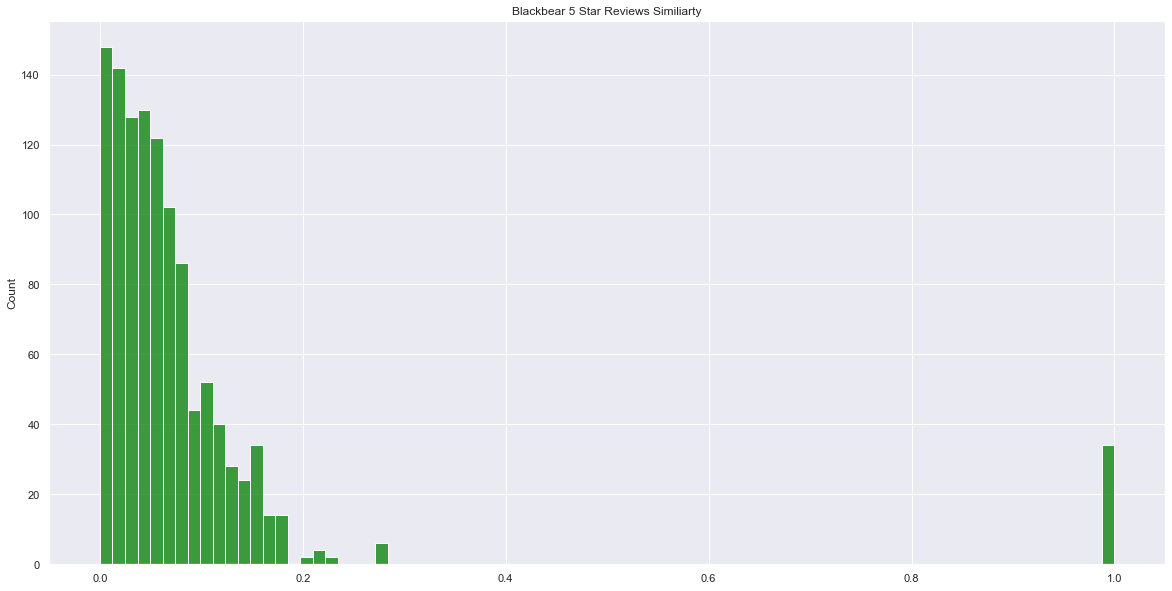

In [28]:
five_star_reviews = reviews_cosine(5,2022,'Yelp')
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(x=five_star_reviews,color='green').set(title='Blackbear 5 Star Reviews Similiarty')
plt.show()

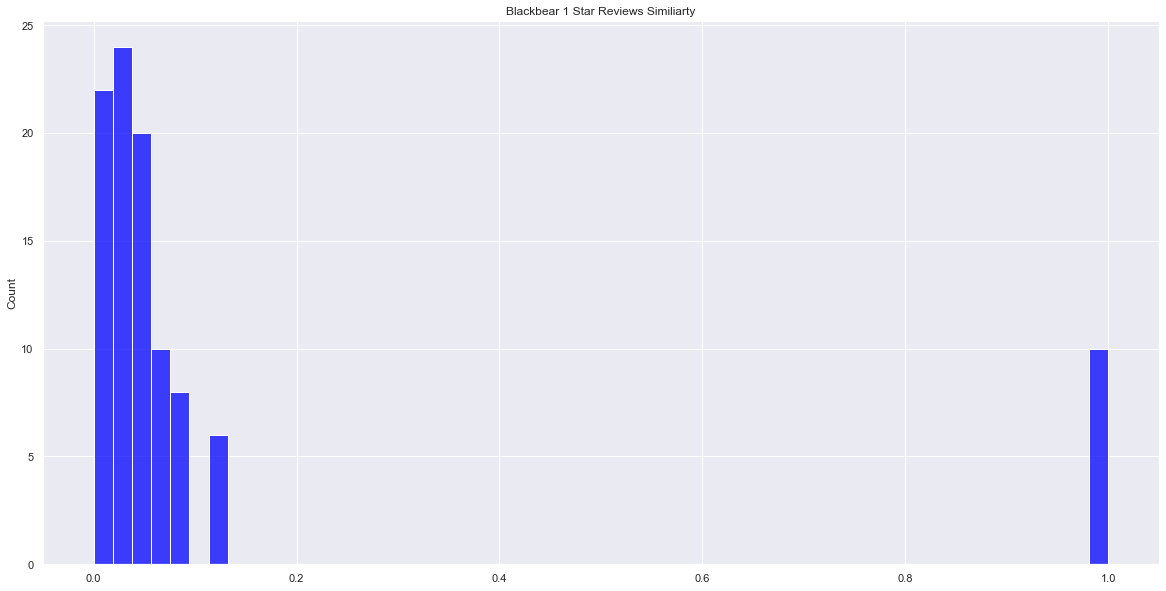

In [29]:
one_star_reviews = reviews_cosine(1,2022,'Yelp')
sns.histplot(x=one_star_reviews,color='blue').set(title='Blackbear 1 Star Reviews Similiarty')
plt.show()

In [30]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [31]:
comment_words = ''
stopwords = set(STOPWORDS)

In [32]:
DF_22_5 = DF_22[DF_22['Rating']==5]

In [33]:
DF_22_Yelp_five_stars = df[(df['DATE']>= '2022-08-01') & (df['Rating']==5) & df['Source']=='Yelp']


In [34]:
DF_22_Yelp_five_stars = df[(df['DATE']>= '2022-08-01') & (df['Rating']==5) & (df['Source']=='Yelp')]
DF_22_Yelp_five_stars

,Review,Date,Overall,Food,Service,Ambience,Rating,Source,DATE,Length_of_Review,YEAR
1,I stopped by blackbear for a quick lunch whil...,9/18/2022,NaN,NaN,NaN,NaN,5,Yelp,2022-09-18,560,2022
3,This place was highly recommended to me by a c...,9/8/2022,NaN,NaN,NaN,NaN,5,Yelp,2022-09-08,537,2022
7,Very hot day in Sacramento but we were pretty ...,8/20/2022,NaN,NaN,NaN,NaN,5,Yelp,2022-08-20,251,2022
8,We hosted a large group outside on their cover...,8/19/2022,NaN,NaN,NaN,NaN,5,Yelp,2022-08-19,328,2022
10,Very good service. Unfortunately it was too ho...,8/14/2022,NaN,NaN,NaN,NaN,5,Yelp,2022-08-14,217,2022
11,Overall this was a great dinning experience. A...,8/13/2022,NaN,NaN,NaN,NaN,5,Yelp,2022-08-13,283,2022
12,Went back a second time and we really liked ou...,8/12/2022,NaN,NaN,NaN,NaN,5,Yelp,2022-08-12,205,2022


## Reviews Vizualized

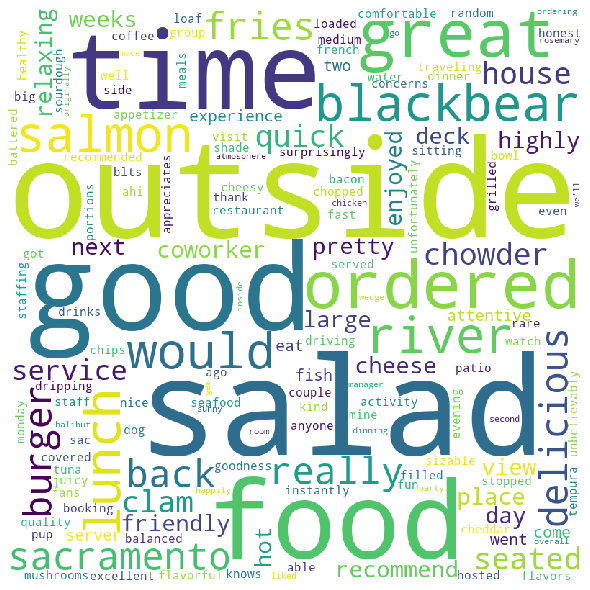

Wall time: 8.09 s


In [35]:
%%time
from wordcloud import WordCloud

DF_22_Yelp_five_stars = df[(df['DATE']>= '2022-08-01') & (df['Rating']==5) & (df['Source']=='Yelp')]





for val in DF_22_Yelp_five_stars.Review:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stops,
                min_font_size = 10).generate(comment_words)

#plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

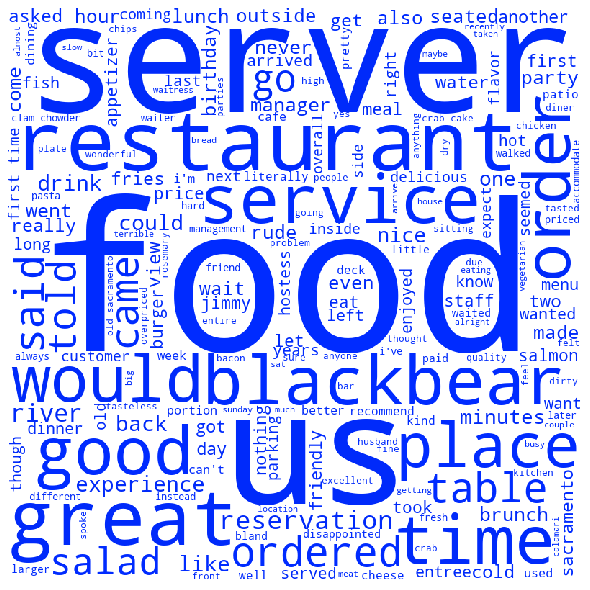

Wall time: 11.8 s


In [51]:
%%time

DF_22_Yelp_one_stars = df[(df['YEAR']== 2022) & (df['Rating']==1) & (df['Source']=='Yelp')]


def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(230,100%%, %d%%)" % np.random.randint(49,51))



for val in DF_22_Yelp_one_stars.Review:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

    one_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stops,
                min_font_size = 10).generate(comment_words)
    one_wordcloud.recolor(color_func = grey_color_func)


#plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(one_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In the image above for one stars, we see a lot of similiarties between 1 star reviews and 5 star reviews. It seems the same thing that makes a 5 star exp can also make a 1 star exp. Let's try to vizualize the similiaries so we know what items of focus for the servers to work.

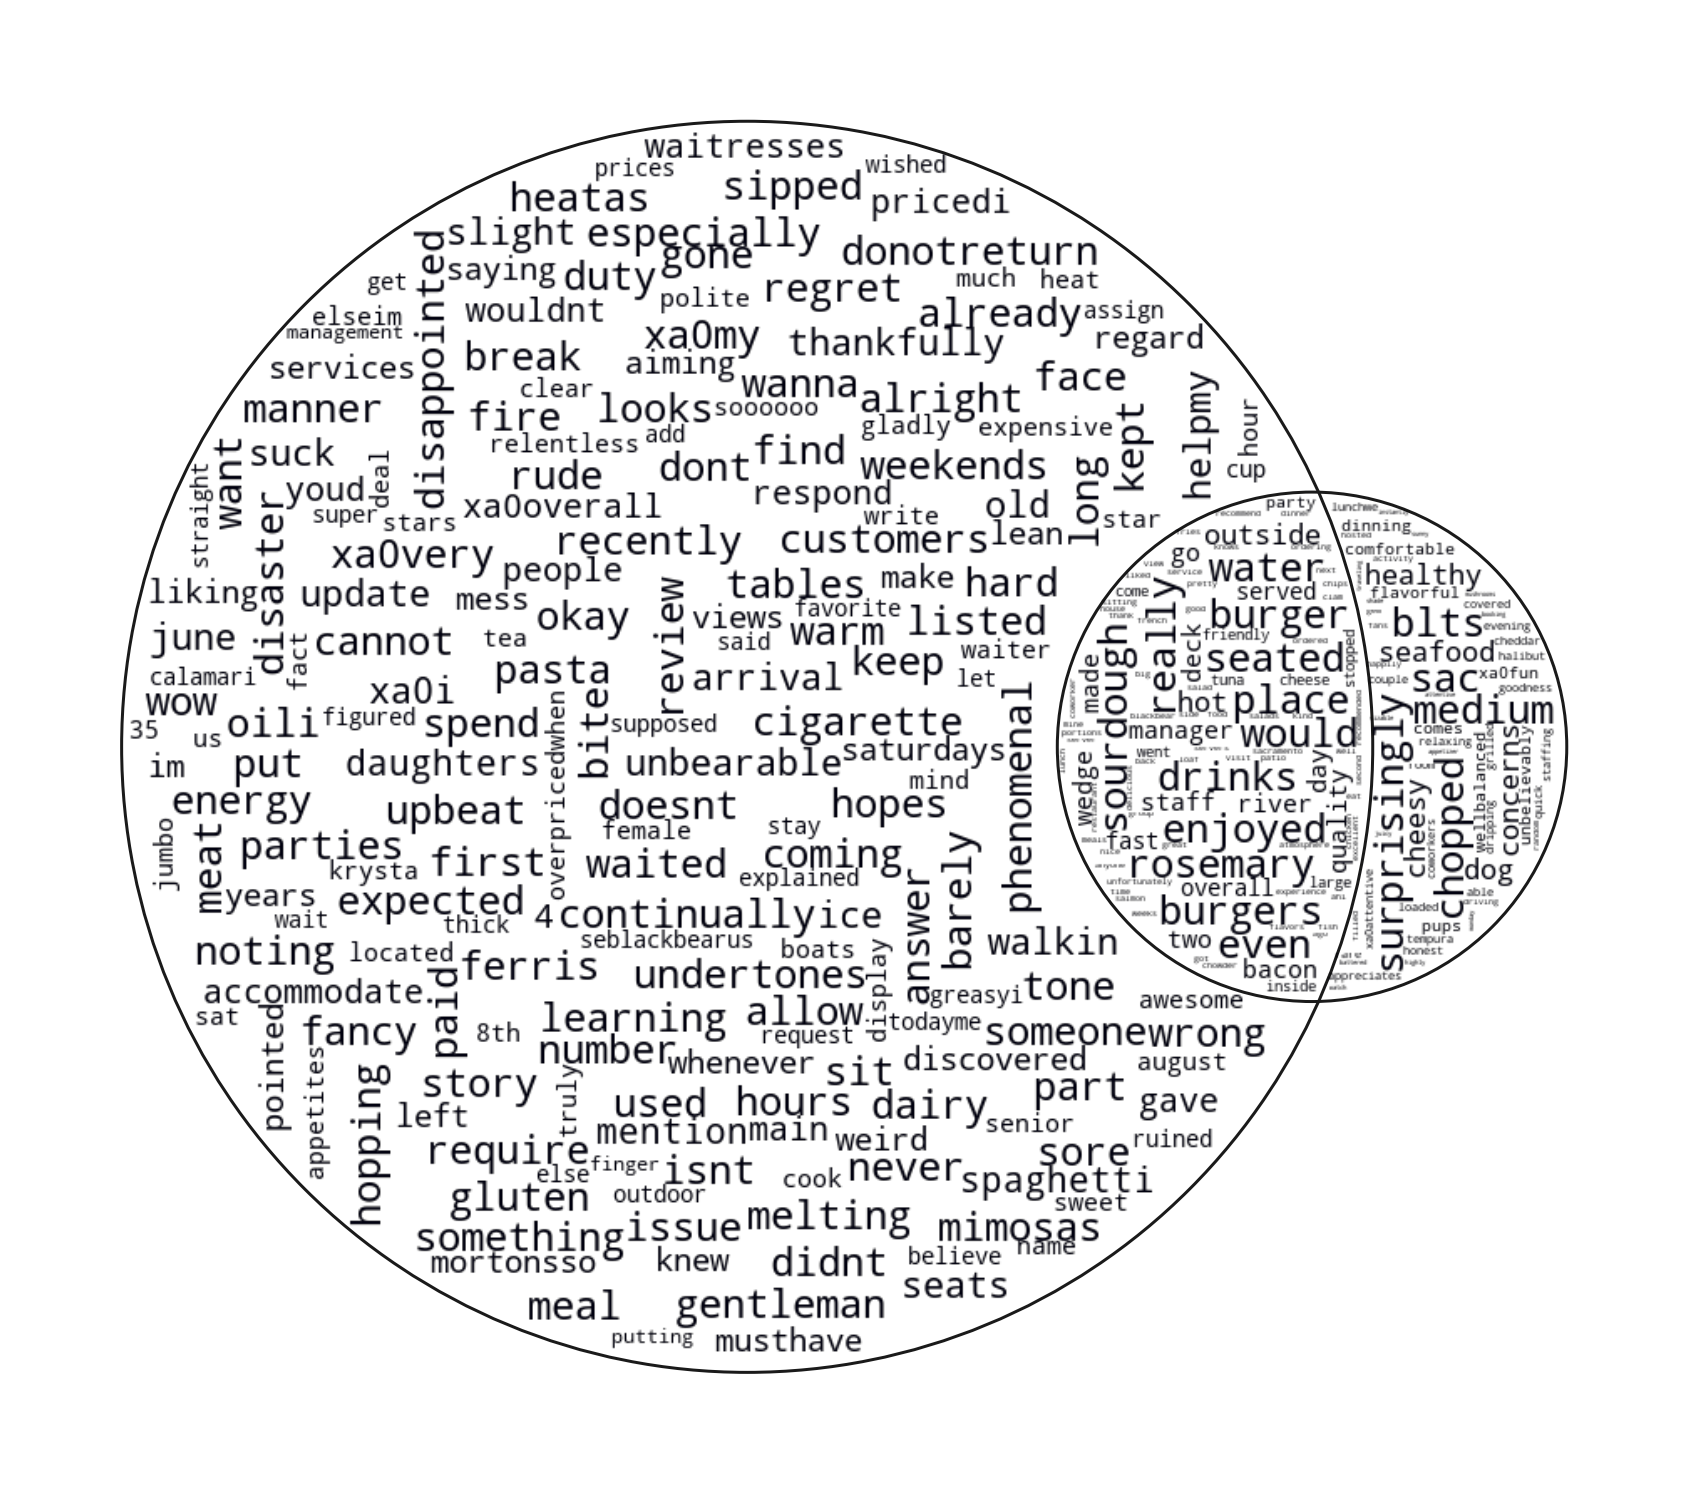

In [37]:
from matplotlib_venn_wordcloud import venn2_wordcloud
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,30)
 
sets = []

for string in [DF_22_Yelp_one_stars['Review'].to_list() , DF_22_Yelp_five_stars['Review'].to_list() ]:
    
    string = str(string)
    # get a word list
    words = string.split(' ')

    # remove non alphanumeric characters
    words = [''.join(ch for ch in word if ch.isalnum()) for word in words]

    # convert to all lower case
    words = [word.lower() for word in words]
    
    #Remove sotp words
    words = [word for word in words if not word in stops]
    
    sets.append(set(words))

# create visualisation
venn2_wordcloud(sets)

The above images shows the similiarities between 1 Star Yelp Reviews and 5 star reviews. It seems that there is a bunch of ways to get a 1 star review, while there are only a few things to do to get a 5 star review. This stresses creating a great experience, and likely higher reviews will follow.

## OpenTable Reviews

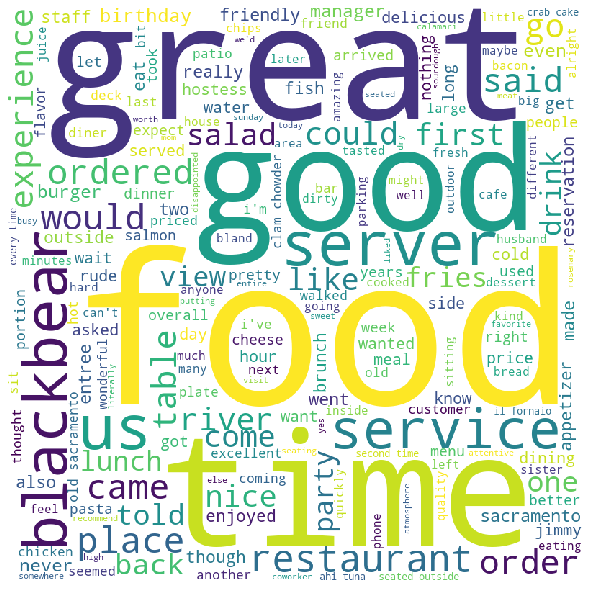

In [38]:
from wordcloud import WordCloud

DF_22_OpenTable_five_stars = df[(df['DATE']>= '2022-08-01') & (df['Rating']==5) & (df['Source']=='OpenTable')]





for val in DF_22_OpenTable_five_stars.Review:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stops,
                min_font_size = 10).generate(comment_words)

#plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

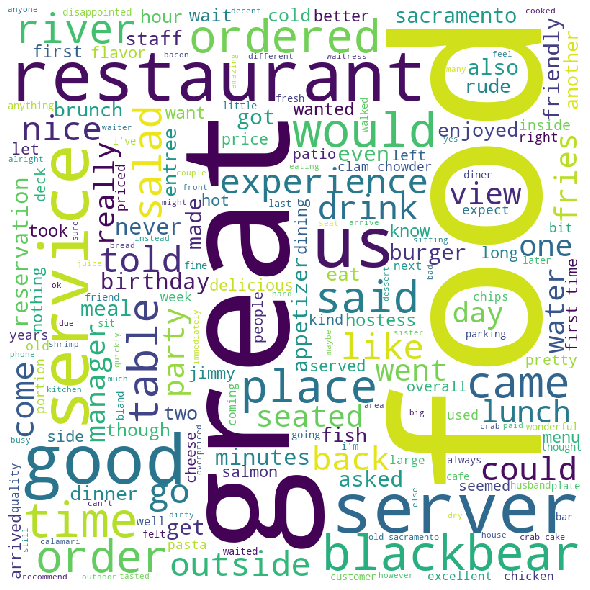

In [39]:
DF_22_OpenTable_one_two_three_stars = df[(df['YEAR']== 2022) & (df['Rating']<=2) & (df['Source']=='OpenTable')]





for val in DF_22_OpenTable_one_two_three_stars.Review:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stops,
                min_font_size = 10).generate(comment_words)

#plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Assumption Testing

In [40]:
OpenTable = df[df['Source']=='OpenTable']
OpenTable_Ratings = OpenTable['Rating'].to_list()
print("Length of OpenTable_Ratings list is",len(OpenTable_Ratings))
print("--------------------------")
Yelp = df[df['Source']=='Yelp']
Yelp_Ratings = Yelp['Rating'].to_list()
print("Length of Yelp Ratings list is",len(Yelp_Ratings))

Length of OpenTable_Ratings list is 860
--------------------------
Length of Yelp Ratings list is 350


In [41]:
OpenTable_Ratings = np.array(OpenTable_Ratings)
Yelp_Ratings = np.array(Yelp_Ratings)

In [42]:
print("OpenTable avg is ",OpenTable_Ratings.mean())
print("--------------------------")
print("Yelp avg is ",Yelp_Ratings.mean())

OpenTable avg is  4.273255813953488
--------------------------
Yelp avg is  3.5285714285714285


Above, we have an uneven sample size and our means are nearly 1 star different. But is the difference in means statistically signficiant?
Before we t-test, we need to check for assumptions.

### Checking Assumptions

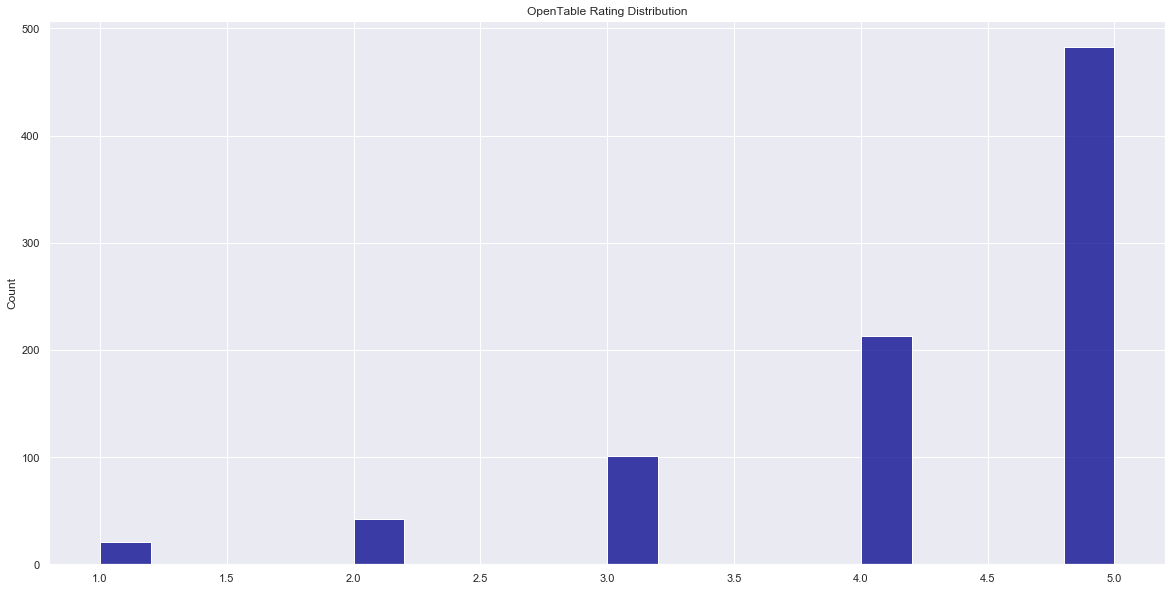

In [43]:
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(x=OpenTable_Ratings,color='darkblue').set(title='OpenTable Rating Distribution')
plt.show()

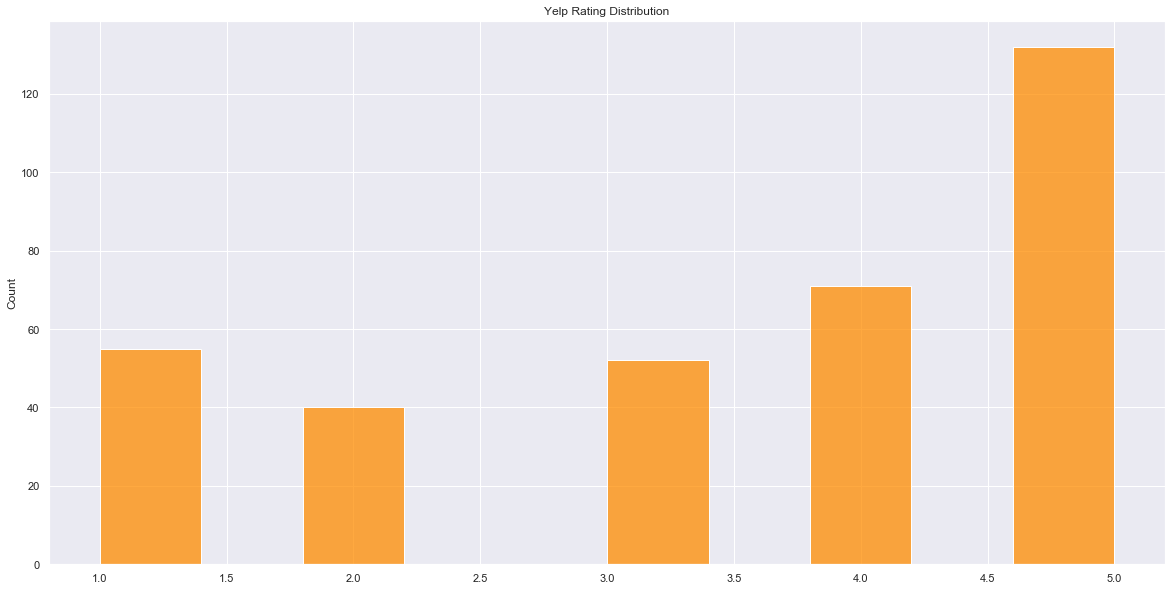

In [44]:
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(x=Yelp_Ratings,color='darkorange').set(title='Yelp Rating Distribution')
plt.show()

We clearly do not have normal distribution for either groups. We could try a log transform, but Let's skip that and jump straight into non-parametric testing. I'll use Kruskal-Wlllis Testing. 

In [45]:
from scipy import stats

In [46]:
stats.kruskal(OpenTable_Ratings,Yelp_Ratings)

KruskalResult(statistic=66.43168953224928, pvalue=3.622316082144564e-16)

Our P-value is 3.622316082144564e-16 !!!, so we would reject the null hyptohesis at any alpha value. Note since we are doing kruskal-wells testing,Our hypothesis is that the medians are not equal. 


what does this mean in business sense?
Well the medians of both groups are different, meaning one is higher and one is lower.  I think it's safe to assume that people who visit the resturant via opentable have a better experience than those who walk-in(yelp). This makes a strong arguement to focus on increasing resversatations instead of  the unknown of walk-ins.  Walk-ins have a mixed experience and the bad reviews are hurting the reputation of resurtant. 

### Deep Dive into OpenTable

In [47]:
OpenTable_DF = df[df['Source']=='OpenTable']

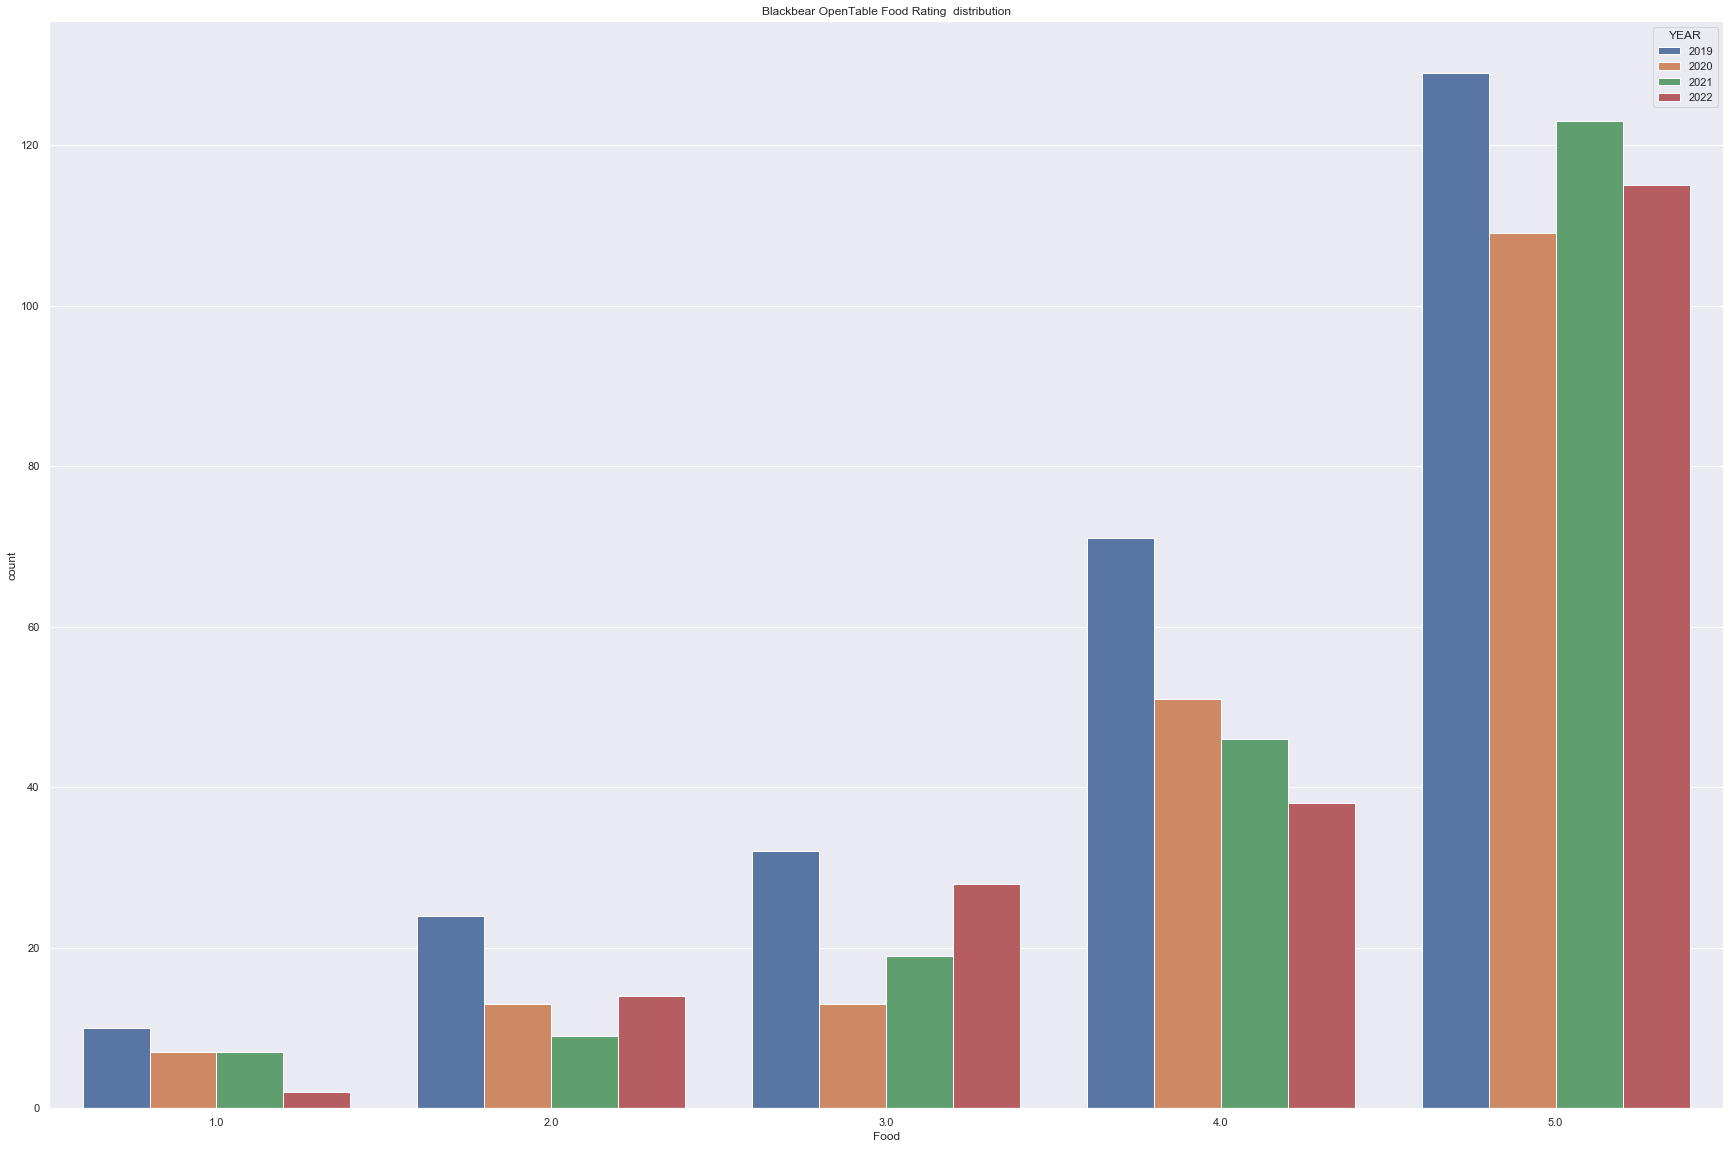

In [48]:
sns.set(rc={'figure.figsize':(30,20)})
sns.countplot(data=OpenTable_DF,x='Food',hue="YEAR").set(title='Blackbear OpenTable Food Rating  distribution')
plt.show()

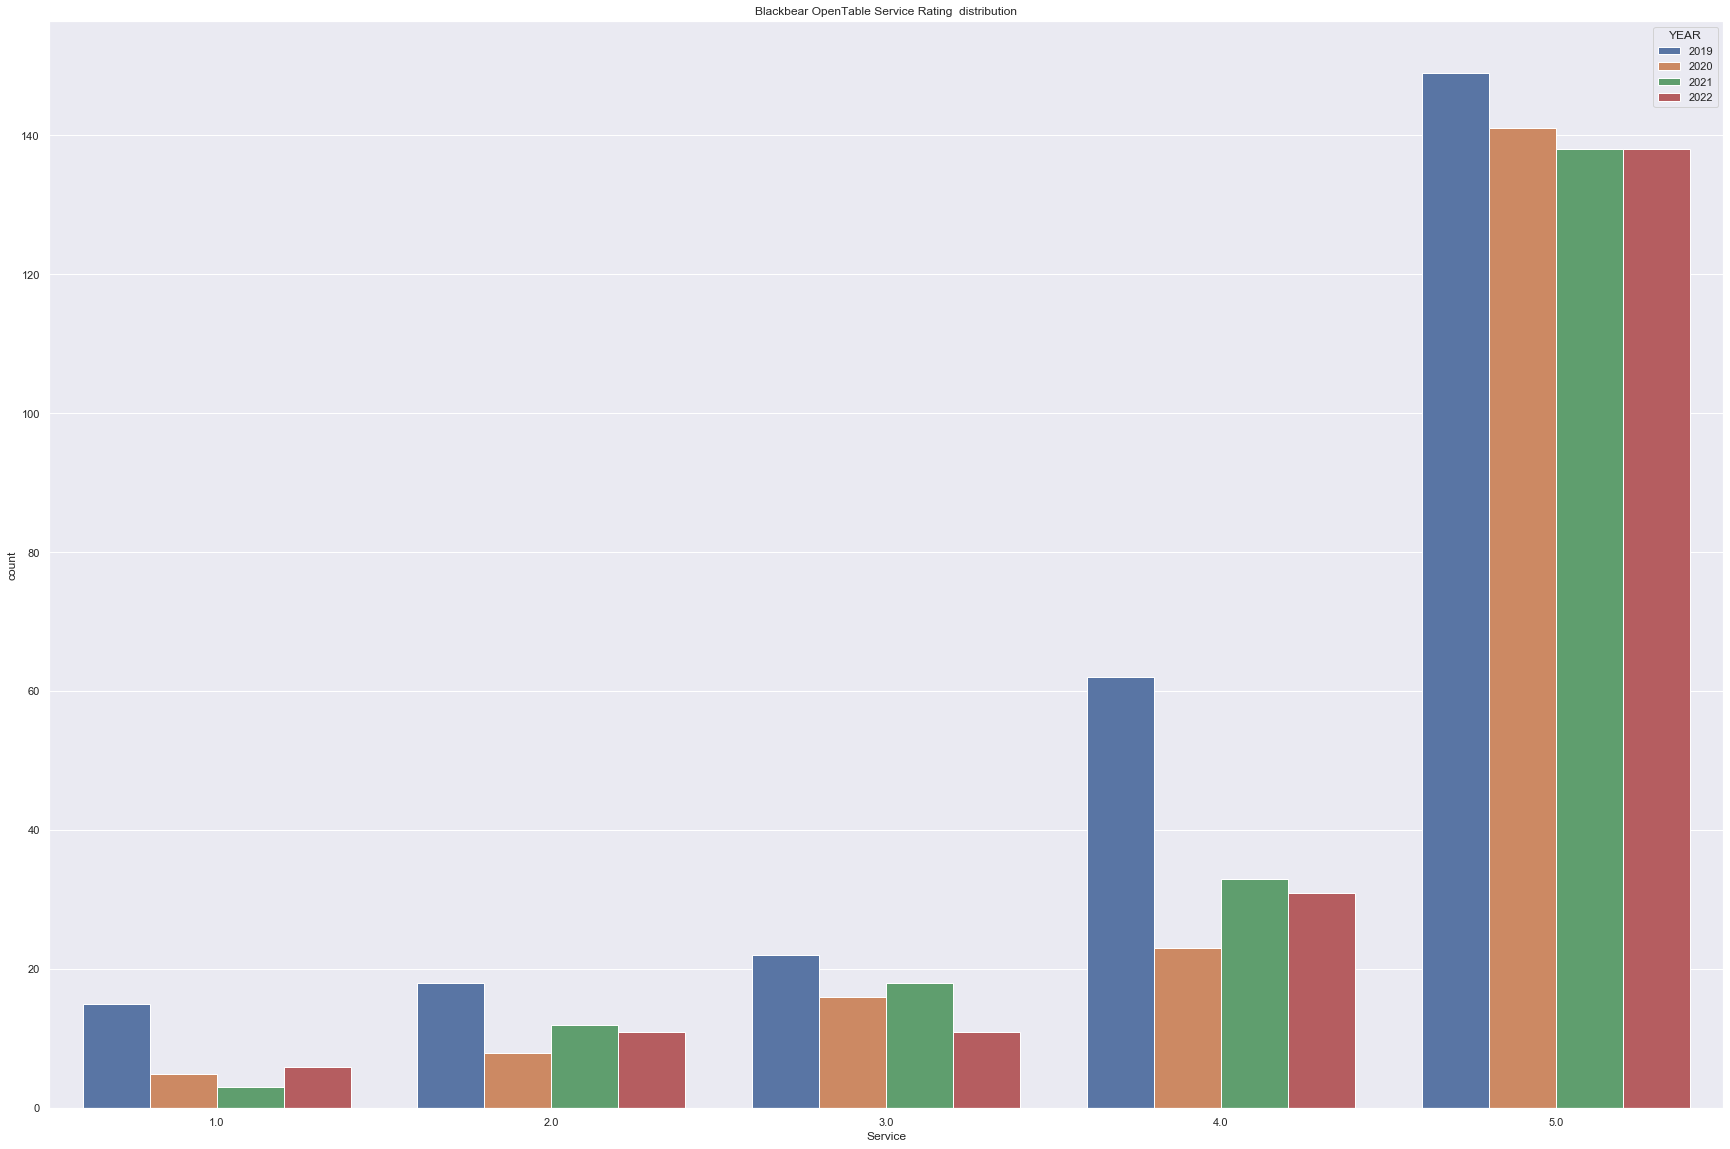

In [49]:
sns.set(rc={'figure.figsize':(30,20)})
sns.countplot(data=OpenTable_DF,x='Service',hue="YEAR").set(title='Blackbear OpenTable Service Rating  distribution')
plt.show()

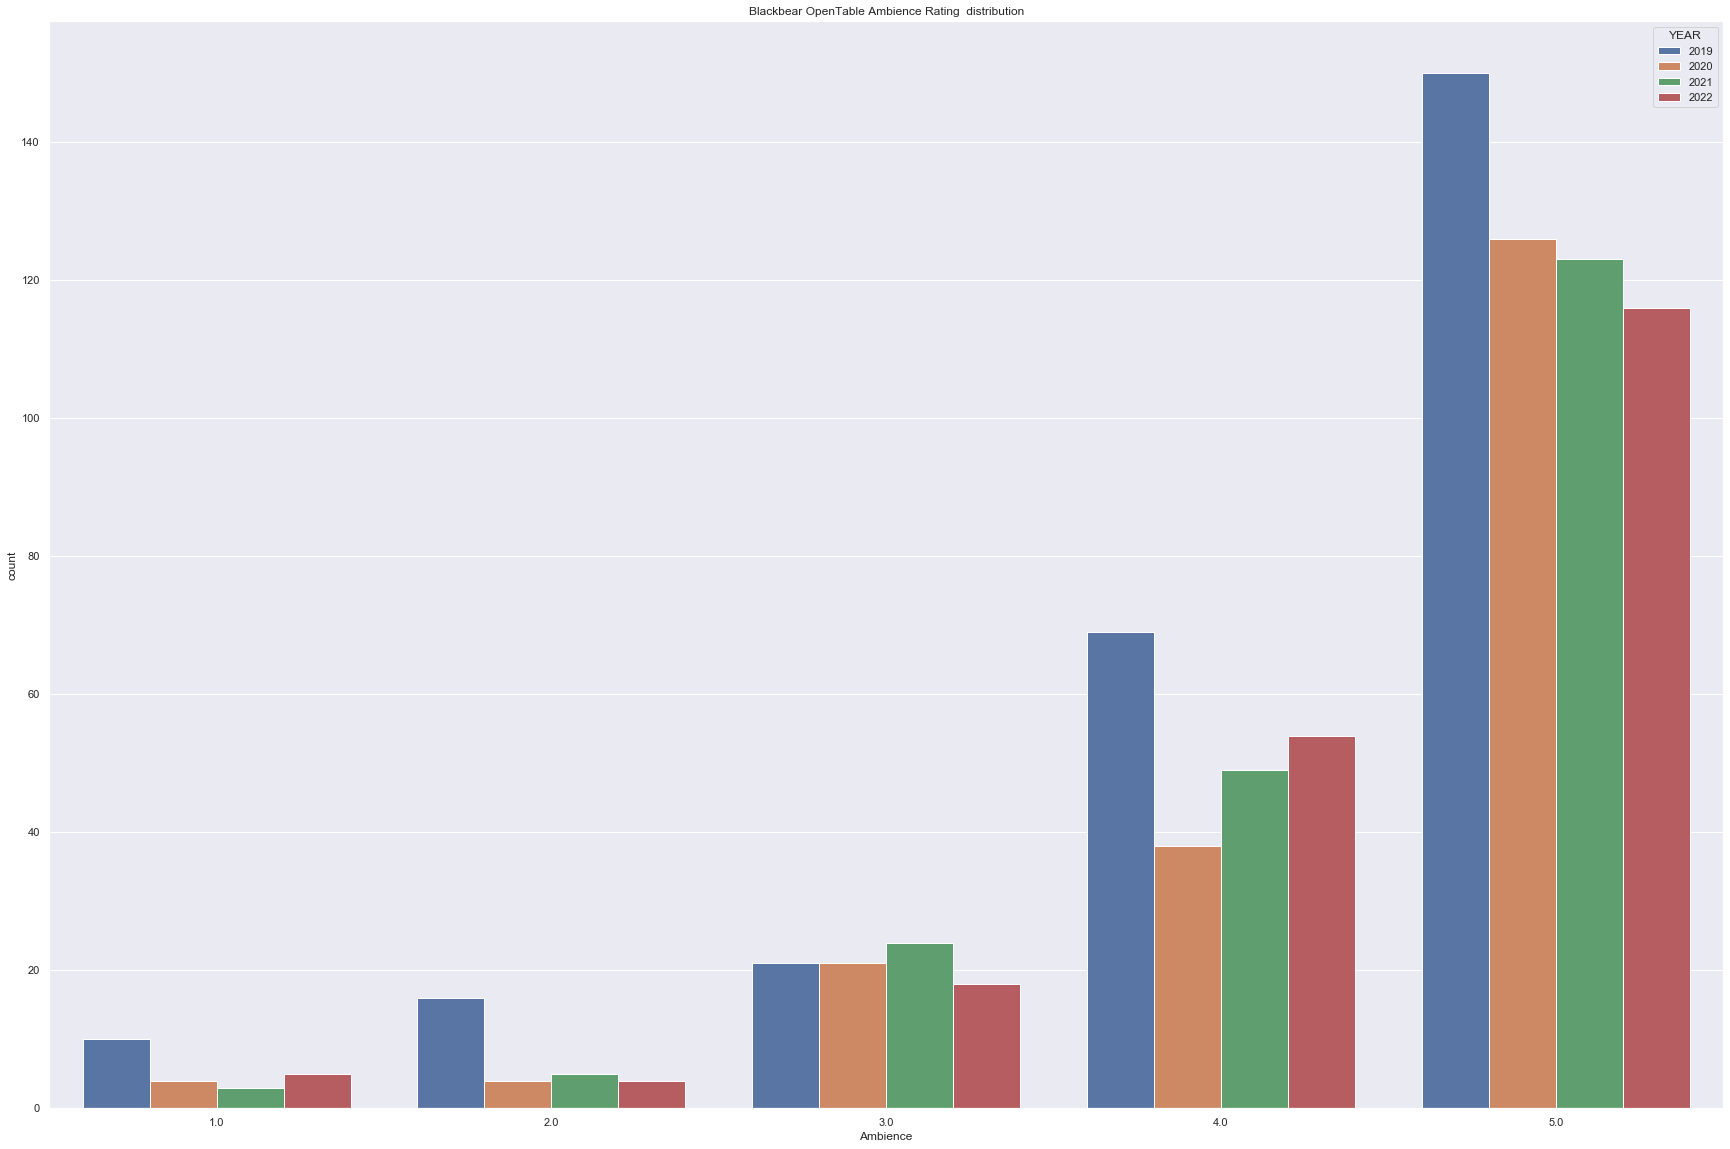

In [50]:
sns.set(rc={'figure.figsize':(30,20)})
sns.countplot(data=OpenTable_DF,x='Ambience',hue="YEAR").set(title='Blackbear OpenTable Ambience Rating  distribution')
plt.show()